# Fresqu'AéroMAPS - outil de simulation des choix de solution

### Ce notebook a pour but de simuler les choix des différnets groupes de l'atelier lors de la partie finale de l'atelier Fresqu'aéro. Il se repose sur l'outil AéroMAPS :


### Planès, T., Delbecq, S., Salgas, A. (2023). AeroMAPS: a framework for performing multidisciplinary assessment of prospective scenarios for air transport. Submitted to Journal of Open Aviation Science.

Pour être sûr que les graphiques sont cohérents avec les choix des groupes, n'oubliez pas d'exécuter les cellules dans l'ordre, et de ré-exécuter les cellules en aval à chaque modification ! 

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_sustainability,
    models_energy_cost,
    models_costs_top_down_specific,
    models_operation_cost,
)


In [2]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost": models_energy_cost,
    "models_costs_top_down_specific": models_costs_top_down_specific,
    "models_operation_cost": models_operation_cost,
}


## Choix du nombre de groupe

Par défaut, le choix pour un groupe est codé, mais vous pouvez choisir d'en rajouter un deuxième ou un troisième ci-dessous. 

In [7]:
# Choix d'avoir un deuxième groupe

import ipywidgets as widgets

mode_2_groupes = widgets.Checkbox(
    value=False,
    description='mode 2 groupes',
    disabled=False,
    indent=False
)
mode_3_groupes = widgets.Checkbox(
    value=False,
    description='mode 3 groupes',
    disabled=False,
    indent=False
)
display(mode_2_groupes)
display(mode_3_groupes)

Checkbox(value=False, description='mode 2 groupes', indent=False)

Checkbox(value=False, description='mode 3 groupes', indent=False)

In [14]:
# Création des process

process_ref = create_process(models=models)
process1 = create_process(models=models)
if mode_2_groupes.value or mode_3_groupes.value:
    process2 = create_process(models=models)
if mode_3_groupes.value:
    process3 = create_process(models=models)

## Quelques chiffres importants pour comprendre le scénario de référence

Les résultats des groupes seront ensuite comparés avec un scénario de référence, qui correspond à la tendance actuelle de l'industrie. Quantitativement, les chiffres veinnent notamment du scénario Airbus :

* La croissance du trafic est de 3% par an, constante.
* Le renouvellement de la flotte a une période de 20 ans.
* L'hydrogène arrive sur le marché en 2035, sur le court courrier.
* Le déploiement des SAFs respectent le plan ReFuelEU, avec notamment 35% de bioSAF + 35% de eSAF en 2050.
* Les flight operations font gagner environ 8% d'effciacité finale en 2050.
* L'amélioration incrémentale technologique ets de 0,5% par an.
* L'allocation des ressources pour l'aérien est conservé par rapport à l'actuel.

In [15]:
# Scénario de référence

# Air traffic evolution

## Growth rate by category [%]
process_ref.parameters.cagr_passenger_short_range_reference_periods = [2020, 2030, 2040, 2050]
process_ref.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, 2.0, 1.0]
process_ref.parameters.cagr_passenger_medium_range_reference_periods = []
process_ref.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process_ref.parameters.cagr_passenger_long_range_reference_periods = []
process_ref.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process_ref.parameters.cagr_freight_reference_periods = []
process_ref.parameters.cagr_freight_reference_periods_values = [3.0]

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process_ref.parameters.load_factor_end_year = 85  # 2019 value: 82.399312

# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process_ref.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
process_ref.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [0.5]
process_ref.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
process_ref.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [0.5]
process_ref.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
process_ref.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [0.5]

## Hydrogen aircraft
### Values for setting logistic functions by category
process_ref.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process_ref.parameters.hydrogen_introduction_year_short_range = 2035
process_ref.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process_ref.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years = []
process_ref.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years_values = [
    1.0
]

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process_ref.parameters.operations_final_gain = 8.0  # [%]
process_ref.parameters.operations_start_year = 2025
process_ref.parameters.operations_duration = 25.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process_ref.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process_ref.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

# Carbon offset
process_ref.parameters.carbon_offset_baseline_level_vs_2019_reference_periods = [2020, 2024, 2050]
process_ref.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0, 100.0]
process_ref.parameters.residual_carbon_offset_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 20.0]

# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process_ref.parameters.net_carbon_budget = 850.0
process_ref.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process_ref.parameters.waste_biomass = 12.0
process_ref.parameters.crops_biomass = 63.0
process_ref.parameters.forest_residues_biomass = 17.0
process_ref.parameters.agricultural_residues_biomass = 57.0
process_ref.parameters.algae_biomass = 15.0
process_ref.parameters.available_electricity = 250.0

# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process_ref.parameters.aviation_carbon_budget_allocated_share = 2.6
process_ref.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process_ref.parameters.aviation_biomass_allocated_share = 5.0
process_ref.parameters.aviation_electricity_allocated_share = 5.0

# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process_ref.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 100, 0.7, 0.7]
process_ref.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 0.0, 3.8, 3.8]
process_ref.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 0.0, 76.3, 76.3]
process_ref.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 0.0, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process_ref.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.electricity_emission_factor_reference_years_values = [429.0, 200.0, 100.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process_ref.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 100, 100, 100]
process_ref.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process_ref.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process_ref.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process_ref.parameters.hydrogen_gas_share_reference_years_values = [71, 0, 0, 0]



In [16]:
process_ref.compute()

In [17]:
# Création de la liste des cartes chosisies par le premier groupe

Liste_des_cartes=['Allouer un budget carbone','Réglementation et mesures économiques','Sobriété','Compensation des émissions','Nouveaux vecteurs énergétiques','Report modal','Efficacité des opérations','Technologie']
Liste_des_widgets1=[]

for carte in Liste_des_cartes :
    Liste_des_widgets1.append(widgets.Checkbox(
        value=False,
        description=carte,
        disabled=False,
        indent=False
    ))
for widget in Liste_des_widgets1:
    display(widget)

Checkbox(value=False, description='Allouer un budget carbone', indent=False)

Checkbox(value=False, description='Réglementation et mesures économiques', indent=False)

Checkbox(value=False, description='Sobriété', indent=False)

Checkbox(value=False, description='Compensation des émissions', indent=False)

Checkbox(value=False, description='Nouveaux vecteurs énergétiques', indent=False)

Checkbox(value=False, description='Report modal', indent=False)

Checkbox(value=False, description='Efficacité des opérations', indent=False)

Checkbox(value=False, description='Technologie', indent=False)

In [18]:
# Scénario du groupe 1

# Air traffic evolution

## Growth rate by category [%]
process1.parameters.cagr_passenger_short_range_reference_periods = [2020, 2030, 2040, 2050]
process1.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, 2.0, 1.0]
process1.parameters.cagr_passenger_medium_range_reference_periods = []
process1.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process1.parameters.cagr_passenger_long_range_reference_periods = []
process1.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process1.parameters.cagr_freight_reference_periods = []
process1.parameters.cagr_freight_reference_periods_values = [3.0]

# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process1.parameters.load_factor_end_year = 85  # 2019 value: 82.399312

# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process1.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
process1.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [0.5]
process1.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
process1.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [0.5]
process1.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
process1.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [0.5]

## Hydrogen aircraft
### Values for setting logistic functions by category
process1.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process1.parameters.hydrogen_introduction_year_short_range = 2035
process1.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process1.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years = []
process1.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years_values = [1.0]

# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process1.parameters.operations_final_gain = 8.0  # [%]
process1.parameters.operations_start_year = 2025
process1.parameters.operations_duration = 25.0

# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process1.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process1.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

# Carbon offset
process1.parameters.carbon_offset_baseline_level_vs_2019_reference_periods = [2020, 2024, 2050]
process1.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0, 100.0]
process1.parameters.residual_carbon_offset_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 20.0]

# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process1.parameters.net_carbon_budget = 850.0
process1.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process1.parameters.waste_biomass = 12.0
process1.parameters.crops_biomass = 63.0
process1.parameters.forest_residues_biomass = 17.0
process1.parameters.agricultural_residues_biomass = 57.0
process1.parameters.algae_biomass = 15.0
process1.parameters.available_electricity = 250.0

# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process1.parameters.aviation_carbon_budget_allocated_share = 2.6
process1.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process1.parameters.aviation_biomass_allocated_share = 5.0
process1.parameters.aviation_electricity_allocated_share = 5.0

# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process1.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 100, 0.7, 0.7]
process1.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 0.0, 3.8, 3.8]
process1.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 0.0, 76.3, 76.3]
process1.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 0.0, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process1.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.electricity_emission_factor_reference_years_values = [429.0, 200.0, 100.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process1.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 100, 100, 100]
process1.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process1.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process1.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process1.parameters.hydrogen_gas_share_reference_years_values = [71, 0, 0, 0]

In [19]:
# Prise en compte des cartes choisies par le premier groupe

#if Liste_des_widgets1[0].value:
#if Liste_des_widgets1[1].value:

if Liste_des_widgets1[2].value:
    if Liste_des_widgetsA[5].value:
        process1.parameters.cagr_passenger_short_range_reference_periods_values = [-5.0, -5.0, -5.0]
    else:
        process1.parameters.cagr_passenger_short_range_reference_periods_values = [-2.0, -3.0, -4.0]
    process1.parameters.cagr_passenger_medium_range_reference_periods_values = [0.0]
    process1.parameters.cagr_passenger_long_range_reference_periods_values = [0.0]
    process1.parameters.cagr_freight_reference_periods_values = [0.0]
if Liste_des_widgets1[3].value:
    process1.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0,85.0]
    process1.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
if Liste_des_widgets1[4].value:
    process1.parameters.biofuel_share_reference_years_values = [0.0, 5.8, 30.0, 50.0]
    process1.parameters.electrofuel_share_reference_years_values = [0.0, 5.2, 15.0, 50.0]
if Liste_des_widgets1[5].value:
    process1.parameters.cagr_passenger_short_range_reference_periods_values = [0.0, 0.0, 0.0]
if Liste_des_widgets1[6].value:
    process1.parameters.load_factor_end_year = 90
    process1.parameters.operations_final_gain = 10.0  # [%]
    process1.parameters.operations_start_year = 2025
    process1.parameters.operations_duration = 25.0
if Liste_des_widgets1[7].value:
    process1.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.0]
    process1.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.0]
    process1.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.0]
    process1.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
    process1.parameters.hydrogen_introduction_year_short_range = 2035
    process1.parameters.fleet_renewal_duration = 15.0

In [20]:
process1.compute()

In [22]:
# Choix des cartes du groupe 2

if mode_2_groupes.value or mode_3_groupes.value :
    Liste_des_widgets2=[]
    for carte in Liste_des_cartes :
        Liste_des_widgets2.append(widgets.Checkbox(
            value=False,
            description=carte,
            disabled=False,
            indent=False
        ))
    for widget in Liste_des_widgets2:
        display(widget)

Checkbox(value=False, description='Allouer un budget carbone', indent=False)

Checkbox(value=False, description='Réglementation et mesures économiques', indent=False)

Checkbox(value=False, description='Sobriété', indent=False)

Checkbox(value=False, description='Compensation des émissions', indent=False)

Checkbox(value=False, description='Nouveaux vecteurs énergétiques', indent=False)

Checkbox(value=False, description='Report modal', indent=False)

Checkbox(value=False, description='Efficacité des opérations', indent=False)

Checkbox(value=False, description='Technologie', indent=False)

In [23]:
# Scénario du groupe 2

if mode_2_groupes.value or mode_3_groupes.value :
    # Air traffic evolution

    ## Growth rate by category [%]
    process2.parameters.cagr_passenger_short_range_reference_periods = [2020, 2030, 2040, 2050]
    process2.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, 2.0, 1.0]
    process2.parameters.cagr_passenger_medium_range_reference_periods = []
    process2.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
    process2.parameters.cagr_passenger_long_range_reference_periods = []
    process2.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
    process2.parameters.cagr_freight_reference_periods = []
    process2.parameters.cagr_freight_reference_periods_values = [3.0]

    # Aircraft fleet and operation evolution - Aircraft load factor

    ## Aircraft load factor in 2050 [%]
    process2.parameters.load_factor_end_year = 85  # 2019 value: 82.399312

    # Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

    ## Drop-in aircraft
    ### Mean annual efficiency gains by category [%]
    process2.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
    process2.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.5]
    process2.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
    process2.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.5]
    process2.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
    process2.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.5]

    ## Hydrogen aircraft
    ### Values for setting logistic functions by category
    process2.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
    process2.parameters.hydrogen_introduction_year_short_range = 2035
    process2.parameters.fleet_renewal_duration = 20.0
    ### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
    process2.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years = []
    process2.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years_values = [
        1.0
    ]

    # Aircraft fleet and operation evolution - Operations

    ## Values for setting the logistic function
    process2.parameters.operations_final_gain = 8.0  # [%]
    process2.parameters.operations_start_year = 2025
    process2.parameters.operations_duration = 25.0

    # Aircraft energy - Introduction of alternative drop-in fuels

    ## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
    process2.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
    process2.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

    # Carbon offset
    process2.parameters.carbon_offset_baseline_level_vs_2019_reference_periods = [2020, 2024, 2050]
    process2.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0, 100.0]
    process2.parameters.residual_carbon_offset_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 20.0]

    # Environmental limits

    ## Carbon budgets and Carbon Dioxide Removal [GtCO2]
    process2.parameters.net_carbon_budget = 850.0
    process2.parameters.carbon_dioxyde_removal_2100 = 280.0

    ## Available energy resources in 2050 [EJ]
    process2.parameters.waste_biomass = 12.0
    process2.parameters.crops_biomass = 63.0
    process2.parameters.forest_residues_biomass = 17.0
    process2.parameters.agricultural_residues_biomass = 57.0
    process2.parameters.algae_biomass = 15.0
    process2.parameters.available_electricity = 250.0

    # Allocation settings

    ## Aviation share of the global (equivalent) carbon budget [%]
    process2.parameters.aviation_carbon_budget_allocated_share = 2.6
    process2.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

    ## Aviation share of the global energy resources (biomass and electricity) [%]
    process2.parameters.aviation_biomass_allocated_share = 5.0
    process2.parameters.aviation_electricity_allocated_share = 5.0

    # Various environmental settings

    ## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
    process2.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 100, 0.7, 0.7]
    process2.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 0.0, 3.8, 3.8]
    process2.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 0.0, 76.3, 76.3]
    process2.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 0.0, 7.4, 7.4]

    ## Emission factors for electricity (2019 value: 429 gCO2/kWh)
    process2.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.electricity_emission_factor_reference_years_values = [429.0, 200.0, 100.0, 30.0]

    ## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
    ## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
    process2.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 100, 100, 100]
    process2.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
    process2.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
    process2.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
    process2.parameters.hydrogen_gas_share_reference_years_values = [71, 0, 0, 0]

In [24]:
# Prise en compte des cartes choisies par le premier groupe

if mode_2_groupes.value or mode_3_groupes.value :
    #if Liste_des_widgets1[0].value:
    #if Liste_des_widgets1[1].value:

    if Liste_des_widgets2[2].value:
        if Liste_des_widgets2[5].value:
            process2.parameters.cagr_passenger_short_range_reference_periods_values = [-5.0, -5.0, -5.0]
        else:
            process2.parameters.cagr_passenger_short_range_reference_periods_values = [-2.0, -3.0, -4.0]
            process2.parameters.cagr_passenger_medium_range_reference_periods_values = [0.0]
            process2.parameters.cagr_passenger_long_range_reference_periods_values = [0.0]
            process2.parameters.cagr_freight_reference_periods_values = [0.0]
    if Liste_des_widgets1[3].value:
        process2.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0,85.0]
        process2.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
    if Liste_des_widgets1[4].value:
        process2.parameters.biofuel_share_reference_years_values = [0.0, 5.8, 30.0, 50.0]
        process2.parameters.electrofuel_share_reference_years_values = [0.0, 5.2, 15.0, 50.0]
    if Liste_des_widgets1[5].value:
        process2.parameters.cagr_passenger_short_range_reference_periods_values = [0.0, 0.0, 0.0]
    if Liste_des_widgets1[6].value:
        process2.parameters.load_factor_end_year = 90
        process2.parameters.operations_final_gain = 10.0  # [%]
        process2.parameters.operations_start_year = 2025
        process2.parameters.operations_duration = 25.0
    if Liste_des_widgets1[7].value:
        process2.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.0]
        process2.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.0]
        process2.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.0]
        process2.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
        process2.parameters.hydrogen_introduction_year_short_range = 2035
        process2.parameters.fleet_renewal_duration = 15.0

In [25]:
process2.compute()

In [26]:
# Choix des cartes du groupe 3

if mode_3_groupes.value :
    Liste_des_widgets3=[]
    for carte in Liste_des_cartes :
        Liste_des_widgets3.append(widgets.Checkbox(
            value=False,
            description=carte,
            disabled=False,
            indent=False
        ))
    for widget in Liste_des_widgets3:
        display(widget)

Checkbox(value=False, description='Allouer un budget carbone', indent=False)

Checkbox(value=False, description='Réglementation et mesures économiques', indent=False)

Checkbox(value=False, description='Sobriété', indent=False)

Checkbox(value=False, description='Compensation des émissions', indent=False)

Checkbox(value=False, description='Nouveaux vecteurs énergétiques', indent=False)

Checkbox(value=False, description='Report modal', indent=False)

Checkbox(value=False, description='Efficacité des opérations', indent=False)

Checkbox(value=False, description='Technologie', indent=False)

In [27]:
# Scénario du groupe 2

if mode_3_groupes.value :
    # Air traffic evolution

    ## Growth rate by category [%]
    process3.parameters.cagr_passenger_short_range_reference_periods = [2020, 2030, 2040, 2050]
    process3.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, 2.0, 1.0]
    process3.parameters.cagr_passenger_medium_range_reference_periods = []
    process3.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
    process3.parameters.cagr_passenger_long_range_reference_periods = []
    process3.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
    process3.parameters.cagr_freight_reference_periods = []
    process3.parameters.cagr_freight_reference_periods_values = [3.0]

    # Aircraft fleet and operation evolution - Aircraft load factor

    ## Aircraft load factor in 2050 [%]
    process3.parameters.load_factor_end_year = 85  # 2019 value: 82.399312

    # Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

    ## Drop-in aircraft
    ### Mean annual efficiency gains by category [%]
    process3.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
    process3.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.5]
    process3.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
    process3.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.5]
    process3.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
    process3.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.5]

    ## Hydrogen aircraft
    ### Values for setting logistic functions by category
    process3.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
    process3.parameters.hydrogen_introduction_year_short_range = 2035
    process3.parameters.fleet_renewal_duration = 20.0
    ### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
    process3.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years = []
    process3.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years_values = [
        1.0
    ]

    # Aircraft fleet and operation evolution - Operations

    ## Values for setting the logistic function
    process3.parameters.operations_final_gain = 8.0  # [%]
    process3.parameters.operations_start_year = 2025
    process3.parameters.operations_duration = 25.0

    # Aircraft energy - Introduction of alternative drop-in fuels

    ## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
    process3.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
    process3.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

    # Carbon offset
    process3.parameters.carbon_offset_baseline_level_vs_2019_reference_periods = [2020, 2024, 2050]
    process3.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0, 100.0]
    process3.parameters.residual_carbon_offset_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 20.0]

    # Environmental limits

    ## Carbon budgets and Carbon Dioxide Removal [GtCO2]
    process3.parameters.net_carbon_budget = 850.0
    process3.parameters.carbon_dioxyde_removal_2100 = 280.0

    ## Available energy resources in 2050 [EJ]
    process3.parameters.waste_biomass = 12.0
    process3.parameters.crops_biomass = 63.0
    process3.parameters.forest_residues_biomass = 17.0
    process3.parameters.agricultural_residues_biomass = 57.0
    process3.parameters.algae_biomass = 15.0
    process3.parameters.available_electricity = 250.0

    # Allocation settings

    ## Aviation share of the global (equivalent) carbon budget [%]
    process3.parameters.aviation_carbon_budget_allocated_share = 2.6
    process3.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

    ## Aviation share of the global energy resources (biomass and electricity) [%]
    process3.parameters.aviation_biomass_allocated_share = 5.0
    process3.parameters.aviation_electricity_allocated_share = 5.0

    # Various environmental settings

    ## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
    process3.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 100, 0.7, 0.7]
    process3.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 0.0, 3.8, 3.8]
    process3.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 0.0, 76.3, 76.3]
    process3.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 0.0, 7.4, 7.4]

    ## Emission factors for electricity (2019 value: 429 gCO2/kWh)
    process3.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.electricity_emission_factor_reference_years_values = [429.0, 200.0, 100.0, 30.0]

    ## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
    ## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
    process3.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 100, 100, 100]
    process3.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
    process3.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
    process3.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
    process3.parameters.hydrogen_gas_share_reference_years_values = [71, 0, 0, 0]

In [28]:
# Prise en compte des cartes choisies par le premier groupe

if mode_3_groupes.value :
    #if Liste_des_widgets1[0].value:
    #if Liste_des_widgets1[1].value:

    if Liste_des_widgets1[2].value:
        if Liste_des_widgetsA[5].value:
            process3.parameters.cagr_passenger_short_range_reference_periods_values = [-5.0, -5.0, -5.0]
        else:
            process3.parameters.cagr_passenger_short_range_reference_periods_values = [-2.0, -3.0, -4.0]
            process3.parameters.cagr_passenger_medium_range_reference_periods_values = [0.0]
            process3.parameters.cagr_passenger_long_range_reference_periods_values = [0.0]
            process3.parameters.cagr_freight_reference_periods_values = [0.0]
    if Liste_des_widgets1[3].value:
        process3.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0,85.0]
        process3.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]
    if Liste_des_widgets1[4].value:
        process3.parameters.biofuel_share_reference_years_values = [0.0, 5.8, 30.0, 50.0]
        process3.parameters.electrofuel_share_reference_years_values = [0.0, 5.2, 15.0, 50.0]
    if Liste_des_widgets1[5].value:
        process3.parameters.cagr_passenger_short_range_reference_periods_values = [0.0, 0.0, 0.0]
    if Liste_des_widgets1[6].value:
        process3.parameters.load_factor_end_year = 90
        process3.parameters.operations_final_gain = 10.0  # [%]
        process3.parameters.operations_start_year = 2025
        process3.parameters.operations_duration = 25.0
    if Liste_des_widgets1[7].value:
        process3.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.0]
        process3.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.0]
        process3.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.0]
        process3.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
        process3.parameters.hydrogen_introduction_year_short_range = 2035
        process3.parameters.fleet_renewal_duration = 15.0

In [29]:
process3.compute()

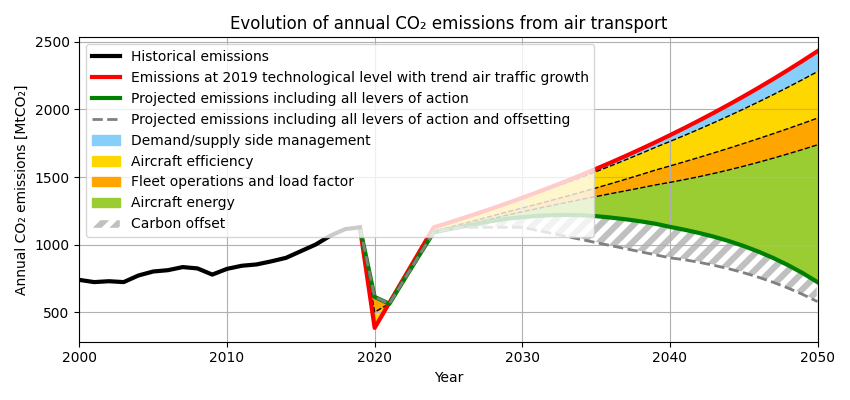

In [30]:
process_ref.plot("air_transport_co2_emissions", save=False)

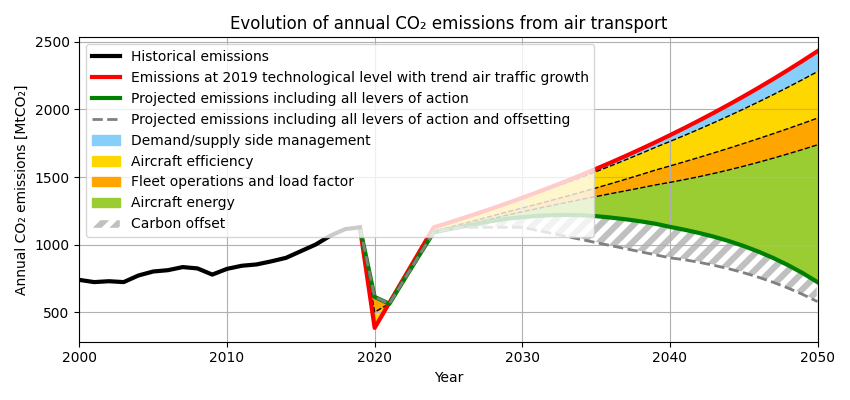

In [31]:
process1.plot("air_transport_co2_emissions", save=False)

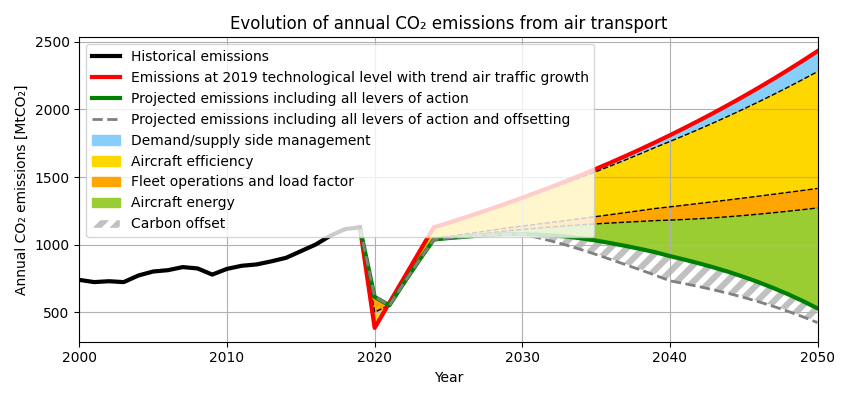

In [32]:
if mode_2_groupes.value or mode_3_groupes.value:
    process2.plot("air_transport_co2_emissions", save=False)

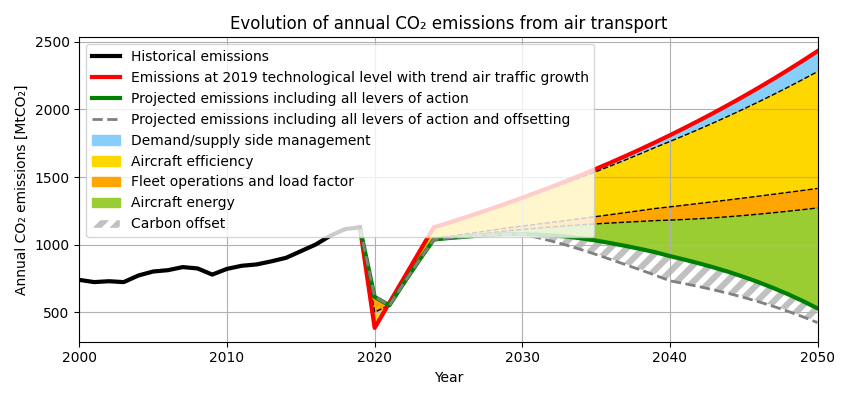

In [33]:
if mode_3_groupes.value :
    process3.plot("air_transport_co2_emissions", save=False)

In [34]:
process_ref.list_available_plots();

In [35]:
process_ref.list_float_inputs();